<a href="https://colab.research.google.com/github/abdulwasaeee/Linear-Regression/blob/main/CV%2BLRextension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv("df.csv",header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [51]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [52]:
df.loc[:122,"region"]=0
df.loc[122:,"region"]=1

In [53]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [54]:
df["region"]=df["region"].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [56]:
df=df.dropna().reset_index(drop=True)

df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [57]:
df=df.drop(122).reset_index(drop=True)
df.iloc[122]

,122
day,01
month,06
year,2012
Temperature,32
RH,71
Ws,12
Rain,0.7
FFMC,57.1
DMC,2.5
DC,8.2


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [59]:
df[['day','month'	,'year','Temperature'	,' RH'	,' Ws']]=df[['day','month'	,'year','Temperature'	,' RH'	,' Ws']].astype(int)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4    RH          243 non-null    int64 
 5    Ws          243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [61]:
objects=[i for i in df.columns if df[i].dtypes=='object']
objects

['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ']

In [62]:
for i in objects:
  if i!='Classes  ':
    df[i]=df[i].astype(float)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [64]:
df.to_csv('df2,csv',index=False)

In [65]:
dfc=df.drop(['day','month','year'],axis=1)
dfc["Classes  "].dtype

dtype('O')

In [66]:
dfc

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [67]:
dfc["Classes  "] = np.where(dfc["Classes  "].str.contains('not fire'), 1, 0)

In [68]:
dfc["Classes  "].value_counts()

,count
Classes,
0,137
1,106


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': ' RH'}>, <Axes: title={'center': ' Ws'}>],
       [<Axes: title={'center': 'Rain '}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes  '}>,
        <Axes: title={'center': 'region'}>]], dtype=object)

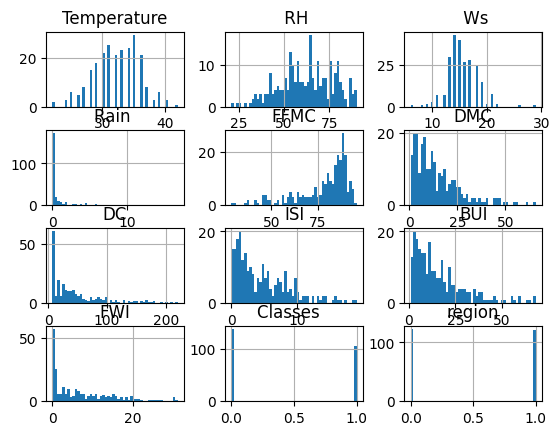

In [48]:
dfc.hist(bins=50)

/tmp/ipython-input-69-727005298.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


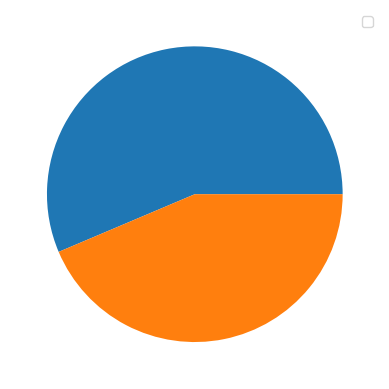

In [69]:
per=dfc["Classes  "].value_counts(normalize=True)*100
plt.pie(dfc["Classes  "].value_counts())
plt.legend()

In [70]:
dfc.rename(columns={"Classes  ": "classes"},inplace=True)

In [71]:
dfc["classes"].value_counts()

,count
classes,
0,137
1,106


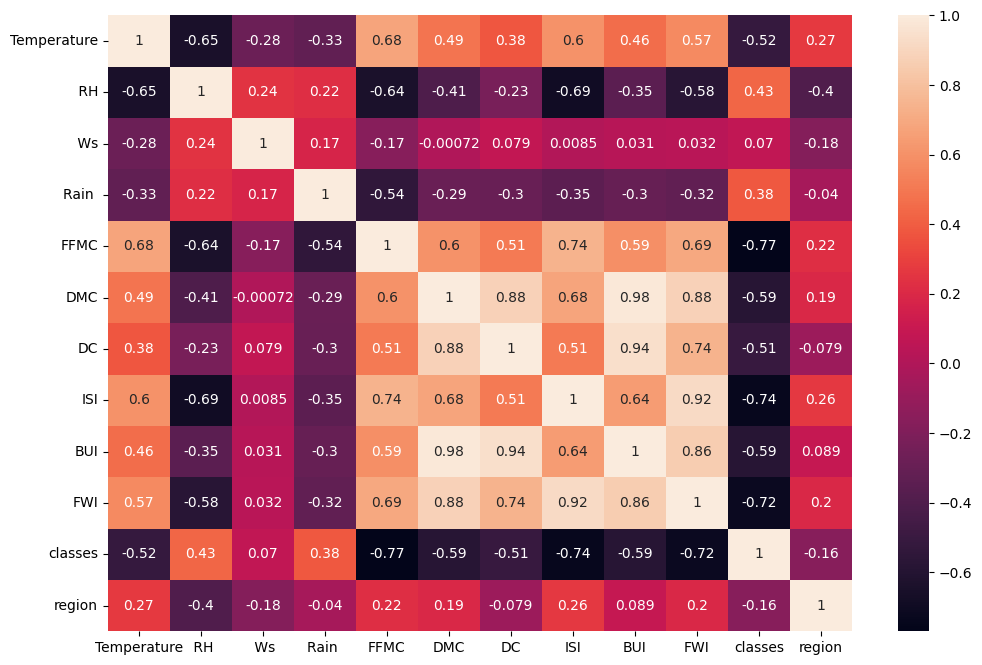

In [72]:
plt.figure(figsize=(12, 8))
sns.heatmap(dfc.corr(), annot=True)
plt.show()

In [73]:
df["Classes  "]=np.where(df["Classes  "].astype(str).str.contains('not fire'),0,1)

<Axes: xlabel='month', ylabel='count'>

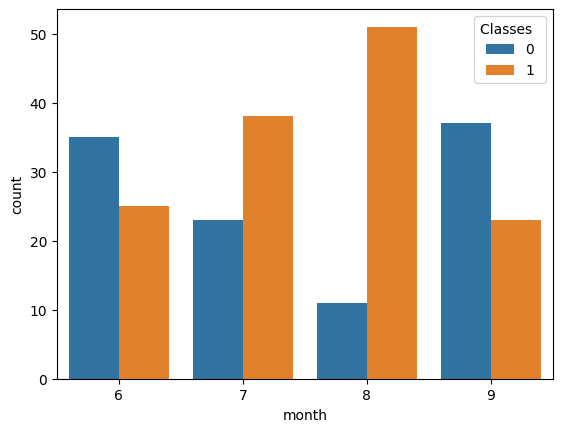

In [74]:
sns.countplot(x="month",hue="Classes  ",data=df)

In [75]:
dfc.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [76]:
dfc["classes"].unique()

array([1, 0])

In [77]:
y=dfc["FWI"]
x=dfc.drop('FWI',axis=1)

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: >

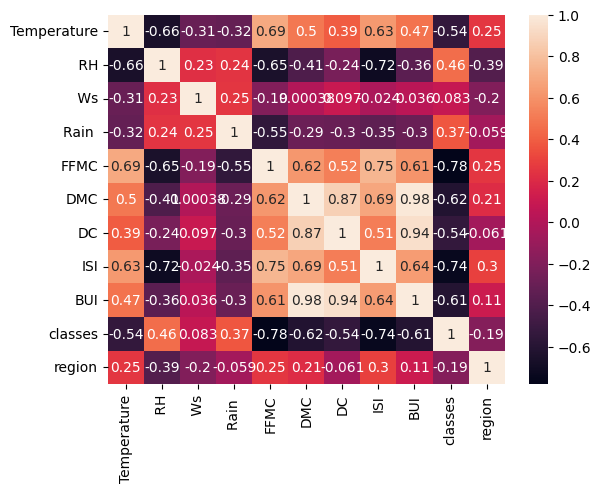

In [79]:
sns.heatmap(x_train.corr(),annot=True)

In [80]:
corr=x.corr()
corr.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'classes', 'region'],
      dtype='object')

In [81]:
#threshold values
def maxcorr(matrix,t):
  colset=set()
  for i in range(len(matrix.columns)):
    for j in range(i):
      if abs(matrix.iloc[i,j])>t:
        colset.add(matrix.columns[i])
  return colset

In [82]:
threshdrop=maxcorr(corr,0.75)
print(threshdrop)

{'classes', 'BUI', 'DC'}


In [83]:
dfc.drop(threshdrop,axis=1,inplace=True)

In [84]:
dfc

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,region
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,0
...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,4.5,6.5,1
239,28,87,15,4.4,41.1,6.5,0.1,0.0,1
240,27,87,29,0.5,45.9,3.5,0.4,0.2,1
241,24,54,18,0.1,79.7,4.3,1.7,0.7,1


In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train2=scaler.fit_transform(x_train)
x_test2=scaler.transform(x_test)

<Axes: >

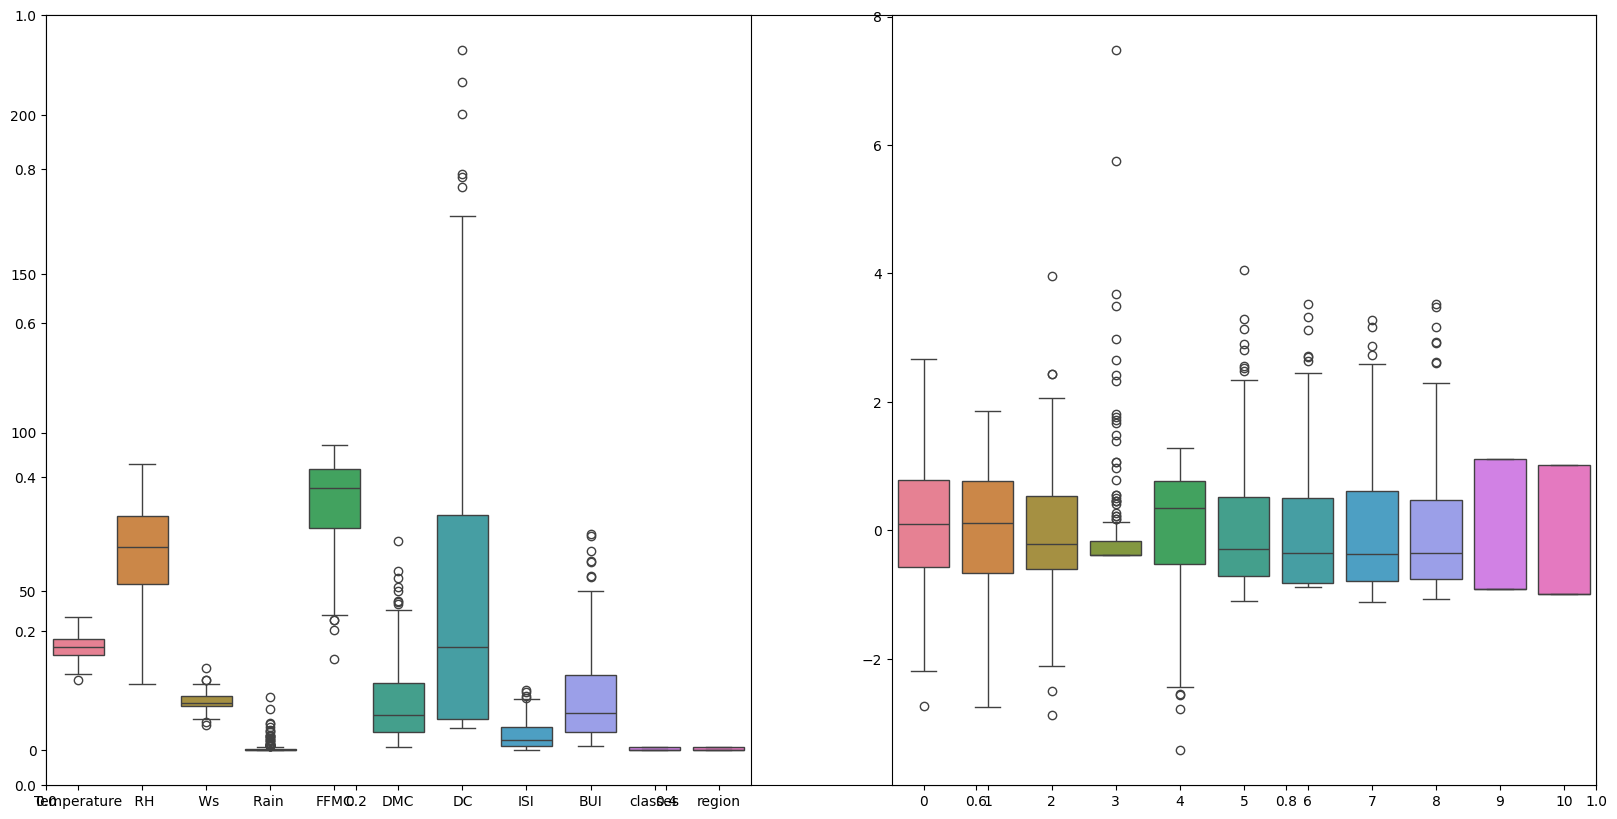

In [87]:
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.subplot(1,2,2)
sns.boxplot(x_train2)

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(x_train2,y_train)
y_pred=lr.predict(x_test2)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,r2)

0.4698243571688505 0.9893850294922101


In [94]:
#lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
las=Lasso()
las.fit(x_train2,y_train)
y_pred=las.predict(x_test2)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,r2)

2.000058348289227 0.9548117077009715


In [95]:
#ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
rid=Ridge()
rid.fit(x_train2,y_train)
y_pred=rid.predict(x_test2)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,r2)

0.5677317795293598 0.9871729594175267


In [96]:
#elasticnet regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
eln=ElasticNet()
eln.fit(x_train2,y_train)
y_pred=eln.predict(x_test2)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,r2)

4.396320516000337 0.900671789556956


In [99]:
from sklearn.linear_model import LassoCV
lcv=LassoCV(cv=5)
lcv.fit(x_train2,y_train)
y_pred=lcv.predict(x_test2)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(lcv.alpha_,mae,r2)


0.053395191056015395 0.5599752461373929 0.9873482065539131


In [100]:
from sklearn.linear_model import RidgeCV
rcv=RidgeCV(cv=5)
rcv.fit(x_train2,y_train)
y_pred=rcv.predict(x_test2)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(rcv.alpha_,mae,r2)


1.0 0.5677317795293598 0.9871729594175267


In [101]:
from sklearn.linear_model import ElasticNetCV
elncv=RidgeCV(cv=5)
elncv.fit(x_train2,y_train)
y_pred=elncv.predict(x_test2)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(elncv.alpha_,mae,r2)


1.0 0.5677317795293598 0.9871729594175267
